In [18]:
import torch
from torch import nn # nn = neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [19]:
# Parameters "known" are created
# build a model that estimates thse numbers
import torch

weight = 0.7
bias = 0.3


#create numbers
start = 0
end = 1

#gap of a step
step = 0.02

# X is INPUT a matrix or a tensor, capitol . Lowercase is a vector
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze adds extra dim

# IDEAL OUTPUT y, this case a linear regression formula
y = weight * X + bias

print(f"Input numbers:\n {X[:10]}\n Output numbers:\n {y[:10]} \n{len(X), len(y)}")

Input numbers:
 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
 Output numbers:
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 
(50, 50)


In [20]:
# We split the data into training and test sets
# One of the most important concepts in machine learning in general
train_split = int(0.8 * len(X))

# creating train and test sets, notice index notation
# getting everything before & after train_split (40)
X_train, y_train = X[:train_split], y[:train_split] # 0-40 = 40
X_test, y_test = X[train_split:], y[train_split:] # 40-50 = 10

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

In [21]:
# Numerical representation of our test and train data for features and labels
X_train, X_test, y_train, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
        

In [22]:
# Making a function to represent the train and test data more accurately

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

  """Plotting training & test data, along with comparing predictions. """
  plt.figure(figsize=(10, 7))

  #train data in blue
  plt.scatter(train_data, train_labels, c = 'orange', s=4, label= 'Training Data')

  #test data in green
  plt.scatter(test_data, test_labels, c = 'purple', s=4, label= 'Testing Data')

  # Checking if predictions exist
  if predictions is not None:

    #if they do plot the predictions, compared to test labels
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend A legend in an axes is an area that describes the elements of a graph.
  plt.legend(prop={"size" : 14});

' No predictions yet so no red dots\n    Make a model that learns the pattern of the orange dots\n    If we fit the model, the X values of the purple dots can predict the Y values of the purple dots\n    Pass model X test to predict Y test\n    Orange dots are input, Purple are ideal outputs\n    A perfect model would have red dots over the purple dots'

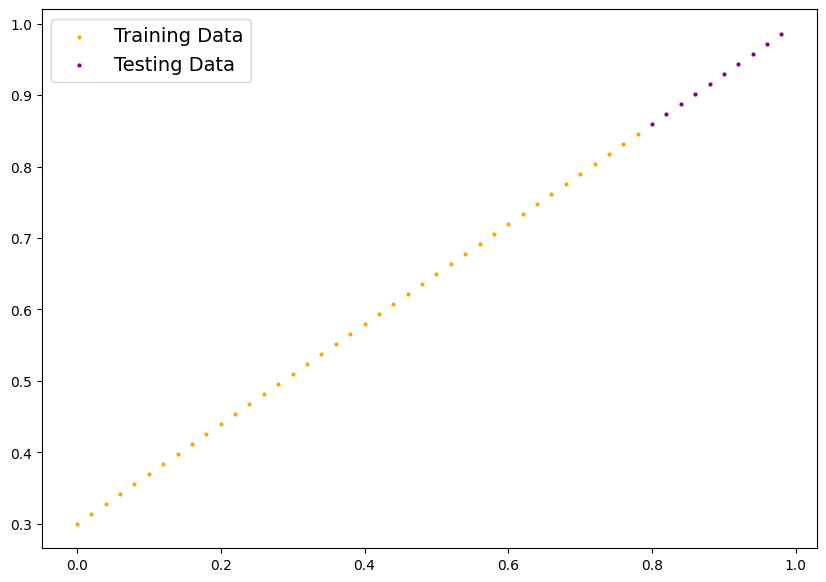

In [23]:
plot_predictions() # No red dots because there are no predictions

""" Our dataset, training data in orage, testing data in purple, and predictions in red """
""" No predictions yet so no red dots
    Make a model that learns the pattern of the orange dots
    If we fit the model, the X values of the purple dots can predict the Y values of the purple dots
    Pass model X test to predict Y test
    Orange dots are input, Purple are ideal outputs
    A perfect model would have red dots over the purple dots"""

Building a Model

In [24]:
""" We created a relationship between X and y, the weight and bias through
the linear regression formula is y = weight * X + bias
gradient (weight) and bias (gradient)


Using linear regression Y = a + b*X   a=weight, b=bias
We need to create a mdoel that has a parameter for a and a parameter for b
"""

' We created a relationship between X and y, the weight and bias through\nthe linear regression formula is y = weight * X + bias\ngradient (weight) and bias (gradient)\n\n\nUsing linear regression Y = a + b*X   a=weight, b=bias\nWe need to create a mdoel that has a parameter for a and a parameter for b\n'

In [25]:
from torch import nn

# creating a linear reg model class, using nn.Module chech toch.nn.Module for more info
class LinearRegressionModel(nn.Module): # inherit from nn.Module, most things in PyTorch inherit from this.
 def __init__(self): # constructor taking self as a parameter
    super().__init__()

    #creating parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Method to deifne computation in the model
  #parameter x is expected to be a torch.Tensor and return a torch.Tensor
 def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias

    """ The model starts with random parameters both 'self' parameters, then it looks at the data training samples in this case
        and then it computers and updates those random numbers to represent the pattern in the data graphed.
        Random values from weight and bias will be put through the foward function.
        It takes the weight and bias and it runs through the 'forward' calculation which is the same formula that we used
        to create our data, this to represent as close as possible, if not perfect the known parameters (0.7 and 0.3)
        Utilizing gradient descent algorithm """


In [26]:
 ## Model building essentials from PyTorch
 '''
 -torch.nn = contains buildings for computational graphs (neural netword could be considered a computational graph)
 -torh.nn.Parameter = What paremeters should be tried on and learned by our models (commonly a PyTorch layer form torch.nn will set these for us)
 -torch.nn.Module = Base class for entirety of neural network modules in PyTorch (if subclassedm should overwrite forward)
 -torch.optim = You can find optimizers here. they are an aid with gradient descent algorithms.
 -def forward() = Defines computation in the model, all nn.Module subclasses require you to overwrite this method
 -torch.utils.data.Dataset = Represents a map between key & sample (label &features) pairs of your data. (e.g. images & associataed labels)
 -torch.utils.data.DataLoader = Creates python iterable over a torch dataset(allowing yo iterate over your data)

 review PyTorch cheaet sheet for more info
 '''

'\n-torch.nn = contains buildings for computational graphs (neural netword could be considered a computational graph)\n-torh.nn.Parameter = What paremeters should be tried on and learned by our models (commonly a PyTorch layer form torch.nn will set these for us)\n-torch.nn.Module = Base class for entirety of neural network modules in PyTorch (if subclassedm should overwrite forward)\n-torch.optim = You can find optimizers here. they are an aid with gradient descent algorithms.\n-def forward() = Defines computation in the model, all nn.Module subclasses require you to overwrite this method\n-torch.utils.data.Dataset = Represents a map between key & sample (label &features) pairs of your data. (e.g. images & associataed labels)\n-torch.utils.data.DataLoader = Creates python iterable over a torch dataset(allowing yo iterate over your data)\n\nreview PyTorch cheaet sheet for more info\n'

In [27]:
# CHECKING CONTENTS of our recently created model
'''
This is done by using .parameters() method
'''

'\nThis is done by using .parameters() method\n'

In [28]:
# Creating a random seed because the parameters are cerated with random values
# If there's no random seed, we'd get different values every time
# We need a manual seed in this case
torch.manual_seed(42)

#Creating an instance of the linear regression model class (this is a subclass of nn.Module)
first_model = LinearRegressionModel()

# checking parameters of model
print(f'Without a list {first_model.parameters()}')
print(f'With a list \n {list(first_model.parameters())}')

Without a list <generator object Module.parameters at 0x786cadf49cb0>
With a list 
 [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [36]:
# Listing named parameters, we can see the random weight & bias here
first_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
# We need to take previous random weight & bias to the set ones, only in this case
# usually there are no set weight&bias values
weight, bias

(0.7, 0.3)

In [43]:
# Prediction making

'''
We will see how well it predicts 'y_test' based on 'X_test'
Passing data through the model (using the forward method), will return a prediction
'''

with torch.inference_mode():
  y_preds = first_model(X_test)
#passing x test data through the instance model
 #it will take x_test values as input and will return y_test values as result
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [44]:
#
# Same operation with no inference mode
#y_preds = first_model(X_test)
#y_preds

In [45]:
# comparing predictions with actual results
y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

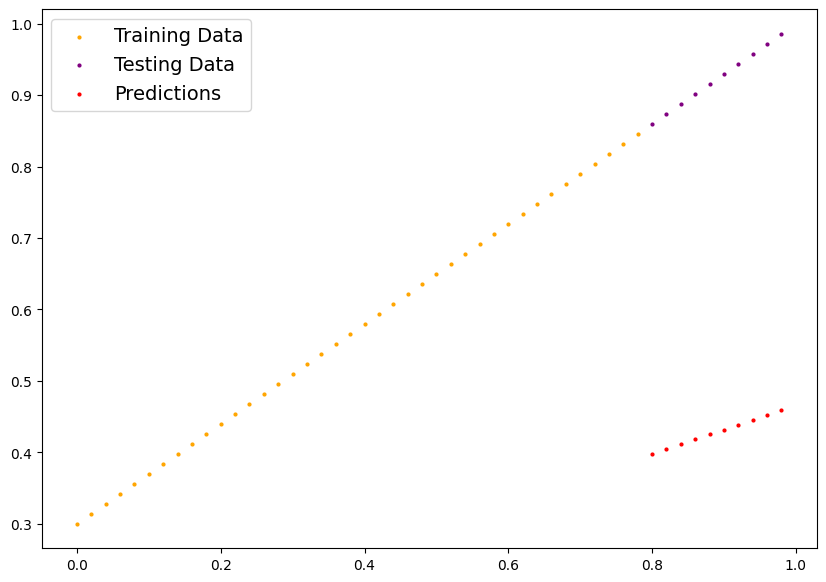

In [46]:
# plotting the predictions
plot_predictions(predictions=y_preds)

# 3. Training the model
## The idea of training is for the model to go from some unknown parameters (that could be random) to actively known parameters.

## Go from a poor representation of data (y_test & y_preds graphed) to a better one

## Loss/Cost/Criterion functions can measure how poor or how wrong your model predictions are.

## A loss fucntion is a function that measures how wrong your model's predictions are to the ideal outputs, the lower the better